# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient develops coronary heart disease (CHD) within a 10-year period.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

You can read more about the data and the variables [here](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

In [3]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [4]:
# Question 1 code here
df = pd.read_csv('framingham.csv').dropna()
# For this assignment, we are dropping any rows that have missing data.
# THIS IS GENERALLY A BAD IDEA. We will discuss alternatives later in the course.

# Code below to display first 5 rows
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the official assignment solution.

In [5]:
# Question 2 code here.

# Don't use the "TenYearCHD" as a feature
X = df.drop('TenYearCHD', axis='columns')
y = df.TenYearCHD.values
# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X , y ,test_size=0.5 , random_state=0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

    *Yes Logistic Regression in sci-kit learn uses scikit-learn uses a penalty by default. The default penalty is L2 (Ridge regression).* 
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

    *Applying a penalty during learning typically results in smaller, more stable coefficients, with the potential for some coefficients to be zero when using L1 regularization. This improves model generalization and reduces the risk of overfitting.*
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

    *The LogisticRegression model in scikit-learn includes an intercept (bias) term by default. This means that the model automatically adds an intercept term internally during training. The fit_intercept parameter is set to True by default, which ensures that the model learns an intercept (bias) without requiring you to add a column of 1s manually.* 

    *If we were to  manually include a column of 1s: would result in redundancy because the model will add its own intercept, and your manual column of 1s would act as an additional feature, potentially skewing the coefficients and performance of the model.*

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.

Using this object, **run a logisitic regression analysis** of `TenYearCHD` (y-variable) against `totChol` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `totChol` and `TenYearCHD` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `totChol`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `totChol`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

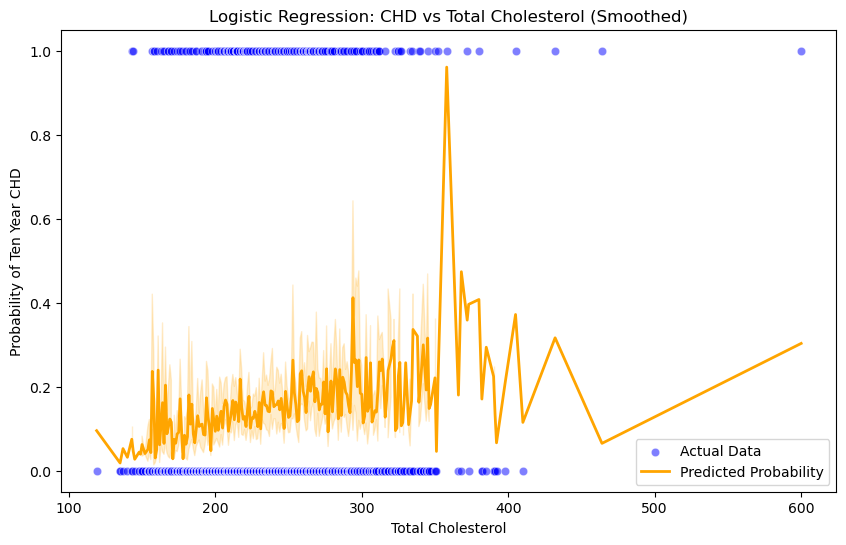

In [23]:
# Sort the test data by 'totChol' to get a smoother curve
sorted_indices = np.argsort(Xtest['totChol'].values)

# Set scatter plot coordinates (actual test data)
xscatter = Xtest['totChol'].values[sorted_indices]
yscatter = ytest[sorted_indices]

# Create a LogisticRegression instance and fit it to the training data
logreg = LogisticRegression(max_iter=10000)
logreg.fit(Xtrain, ytrain)  # X_train and y_train should be your training data

# Set line plot coordinates (sorted values for a smoother plot)
xline = Xtest['totChol'].values[sorted_indices]
yline_prob = logreg.predict_proba(Xtest)[:, 1][sorted_indices]  # Predicted probabilities, sorted

# Plot actual data (scatter)
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=xscatter, y=yscatter, alpha=0.5, color='blue', label='Actual Data')

# Plot the predicted probability line (smooth curve)
sns.lineplot(x=xline, y=yline_prob, color='orange', label="Predicted Probability", linewidth=2)

# Add labels and title for better understanding
ax.set_xlabel('Total Cholesterol')
ax.set_ylabel('Probability of Ten Year CHD')
ax.set_title('Logistic Regression: CHD vs Total Cholesterol (Smoothed)')
plt.legend()
plt.show()


## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your totChol-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

    *Out of all the test instances, 43 were labeled positive by the classifier. This means the model predicted that 43 individuals have a probability of developing CHD above the 0.5 threshold.* 

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

    *One of the positively labeled test instances had a total cholesterol level of 266.0 and was assigned a predicted probability of 0.7018 by the classifier. Since this predicted probability is greater than 0.5, the instance was classified as positive for CHD. The relatively high cholesterol level is likely why the model predicted a higher risk for this individual.* 

* Is this classifier useful for finding specific individuals who will develop CHD? Explain in one or two sentences.

    *The classifier has a high specificity (0.987), meaning it is good at identifying individuals who will not develop CHD. However, the recall (0.079) is quite low, meaning that the model fails to correctly identify most individuals who will actually develop CHD. As a result, this classifier may not be very useful for identifying specific individuals who will develop CHD, as it misses many true positives.* 

In [24]:
# Calculate performance measures from scratch - provided function
# TP: true positives 
# TN: true negatives 
# FP: false positives 
# FN: false negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))  # True positives
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))  # True negatives
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))  # False positives
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))  # False negatives

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # Handle division by zero
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    # Sensitivity (same as recall in binary classification)
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
    
    # Print results
    print("Accuracy:", round(acc, 3), "Recall:", round(recall, 3), "Precision:", round(precision, 3),
          "Sensitivity:", round(sensitivity, 3), "Specificity:", round(specificity, 3))

# Compute criteria using the totChol logistic regression model
# Predict probabilities and labels
y_prob = logreg.predict_proba(Xtest)[:, 1]  # Predicted probabilities for CHD
y_pred = (y_prob >= 0.5).astype(int)  # Apply threshold of 0.5 to get predicted labels (0 or 1)

# Calculate and display performance measures
classes = [0, 1]  # Class 0 = no CHD, Class 1 = CHD
compute_performance(y_pred, ytest, classes)

# How many of the test instances are labeled positive?
num_positive = sum(y_pred)
print(f"Number of positive labels: {num_positive}")

# Select one positively labeled instance and explain
positive_indices = np.where(y_pred == 1)[0]  # Get indices of positive labels
selected_positive_index = positive_indices[0]  # Choose the first positive label
cholesterol_value = Xtest['totChol'].values[selected_positive_index]
predicted_probability = y_prob[selected_positive_index]

print(f"Selected positive instance's Cholesterol level: {cholesterol_value}")
print(f"Predicted probability of CHD for this instance: {predicted_probability}")


tp: 23 tn: 1518 fp: 20 fn: 267
Accuracy: 0.843 Recall: 0.079 Precision: 0.535 Sensitivity: 0.079 Specificity: 0.987
Number of positive labels: 43
Selected positive instance's Cholesterol level: 266.0
Predicted probability of CHD for this instance: 0.7018169364403221


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `TenYearCHD`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Age more strongly associated with CHD, if all other variables are held equal?

    *Since the coefficient for age is positive (0.063029) , it indicates that larger age values are more strongly associated with a higher likelihood of developing CHD, holding all other variables constant. This means that as age increases, the risk of developing coronary heart disease also increases, according to this logistic regression model.*

In [25]:
# Code for Question 6
# Get the coefficients of the model
coefficients = pd.DataFrame({'Feature': Xtrain.columns, 'Coefficient': logreg.coef_[0]})

# Display the coefficient for age
age_coef = coefficients[coefficients['Feature'] == 'age']['Coefficient'].values[0]
print(f"Coefficient for Age: {age_coef}")

# Display all coefficients to see how other variables influence CHD
coefficients


Coefficient for Age: 0.06302873331176041


,Feature,Coefficient
0,male,0.503046
1,age,0.063029
2,education,-0.000261
3,currentSmoker,0.095392
4,cigsPerDay,0.015199
5,BPMeds,0.530358
6,prevalentStroke,0.404243
7,prevalentHyp,0.119061
8,diabetes,-0.330621
9,totChol,0.001924


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

    *The new classifier labeled 43 instances as positive for CHD.* 

* Is this classifier **better or worse than the amount-only classifier** for finding individuals likely to develop CHD? Explain in one or two sentences.*

    *The full-featured classifier has the same performance as the totChol-only classifier in terms of precision, recall, and accuracy. Specifically, it has a recall of 0.079, which indicates that it only correctly identifies 7.9% of the actual CHD cases, meaning it is not significantly better at identifying individuals likely to develop CHD compared to the totChol-only model.Both models have low recall, suggesting that they struggle to capture the majority of true CHD cases, making them not very useful for detecting individuals who will develop CHD. However, they both have high specificity (0.987), meaning they are quite good at identifying individuals who will not develop CHD.* 

In [26]:
# Code for Question 7

# Predict probabilities and labels for the test set using the full model
y_prob_full = logreg.predict_proba(Xtest)[:, 1]  # Predicted probabilities for CHD
y_pred_full = (y_prob_full >= 0.5).astype(int)  # Apply threshold of 0.5 to get predicted labels (0 or 1)

# Call the compute_performance function to compute and display metrics for the new classifier
compute_performance(y_pred_full, ytest, classes=[0, 1])

# How many test instances are labeled positive by the new classifier?
num_positive_full = sum(y_pred_full)
print(f"Number of positive labels in the new classifier: {num_positive_full}")


tp: 23 tn: 1518 fp: 20 fn: 267
Accuracy: 0.843 Recall: 0.079 Precision: 0.535 Sensitivity: 0.079 Specificity: 0.987
Number of positive labels in the new classifier: 43


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

    *Both the totChol-only model and the full model have the same AUC of 0.74, meaning that they have identical discriminatory power. Neither model is better than the other in terms of distinguishing between positive and negative instances.* 

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

    *An AUROC worse than random (less than 0.5) could be caused by:  1.Incorrect labeling: If the positive and negative labels are flipped or inverted, the model might learn to predict the opposite of what it should, leading to an AUROC below 0.5.  2.Model overfitting: The model might be overfitting to noise in the training data, causing it to perform poorly even on the training set. 3.Severe class imbalance: The model may overemphasize the majority class, leading to incorrect predictions for the minority class.* 


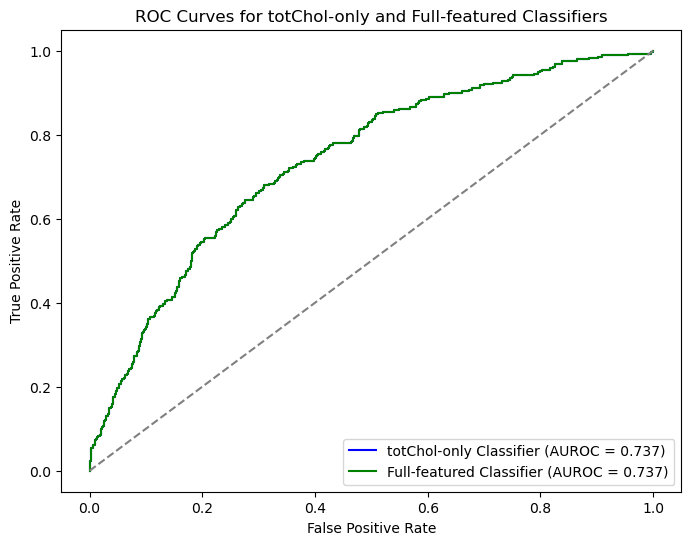

In [31]:
# ROC for totChol-only classifier

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC for totChol-only classifier
fpr_chol, tpr_chol, _ = roc_curve(ytest, y_prob)  # y_test and y_prob are from the totChol-only classifier
roc_auc_chol = roc_auc_score(ytest, y_prob)

# ROC for full-featured classifier
fpr_full, tpr_full, _ = roc_curve(ytest, y_prob_full)  # y_test_full and y_prob_full are from the full-featured classifier
roc_auc_full = roc_auc_score(ytest, y_prob_full)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_chol, tpr_chol, color='blue', label=f'totChol-only Classifier (AUROC = {roc_auc_chol:.3f})')
plt.plot(fpr_full, tpr_full, color='green', label=f'Full-featured Classifier (AUROC = {roc_auc_full:.3f})')

# Plot diagonal line for random chance (AUROC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for totChol-only and Full-featured Classifiers')
plt.legend(loc='lower right')

plt.show()


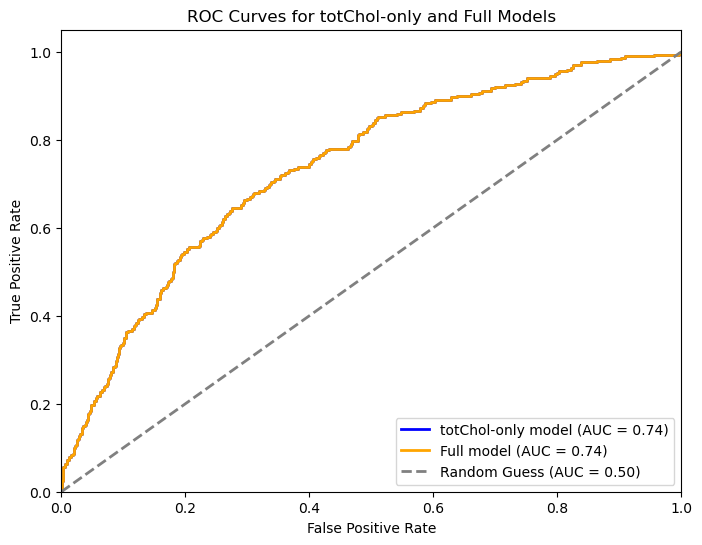

In [32]:
# Plot both ROC curves
plt.figure(figsize=(8, 6))

# ROC for totChol-only classifier
y_prob_chol = logreg.predict_proba(Xtest)[:, 1]  # Predicted probabilities for totChol-only model
fpr_chol, tpr_chol, _ = roc_curve(ytest, y_prob_chol)
roc_auc_chol = auc(fpr_chol, tpr_chol)

# Plot ROC curve for totChol-only model
plt.plot(fpr_chol, tpr_chol, color='blue', lw=2, label=f'totChol-only model (AUC = {roc_auc_chol:.2f})')

# Plot ROC curve for full-featured model
plt.plot(fpr_full, tpr_full, color='orange', lw=2, label=f'Full model (AUC = {roc_auc_full:.2f})')

# Plot random guess line (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label='Random Guess (AUC = 0.50)')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for totChol-only and Full Models')
plt.legend(loc="lower right")
plt.show()


# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 20% of future CHD cases?

    *Based on the curves, the model with all variables has a precision of about 0.4 at a recall of 0.2, whereas the totChol-only classifier has a precision of about 0.2 at the same recall level. Therefore, the full model is preferable because it has a higher precision at the required recall level.* *The model with all variables has a precision of about 0.4 at 0.2 recall, and the amount-only classifier has precision almost 0.2 at 0.2 recall, so the model with all variables is preferable.*


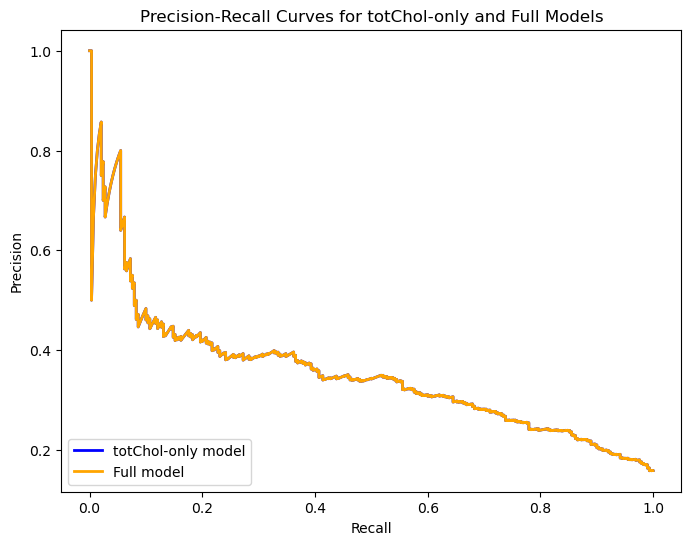

In [33]:
# PRC for totChol-only classifier

from sklearn.metrics import precision_recall_curve

# PRC for totChol-only classifier
y_prob_chol = logreg.predict_proba(Xtest)[:, 1]  # Predicted probabilities for totChol-only model

# Compute precision-recall curve for totChol-only model
precision_chol, recall_chol, _ = precision_recall_curve(ytest, y_prob_chol)

# PRC for full-featured classifier
y_prob_full = logreg.predict_proba(Xtest)[:, 1]  # Predicted probabilities for full model

# Compute precision-recall curve for full-featured model
precision_full, recall_full, _ = precision_recall_curve(ytest, y_prob_full)

# Plot both precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_chol, precision_chol, color='blue', lw=2, label='totChol-only model')
plt.plot(recall_full, precision_full, color='orange', lw=2, label='Full model')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for totChol-only and Full Models')
plt.legend(loc="lower left")
plt.show()


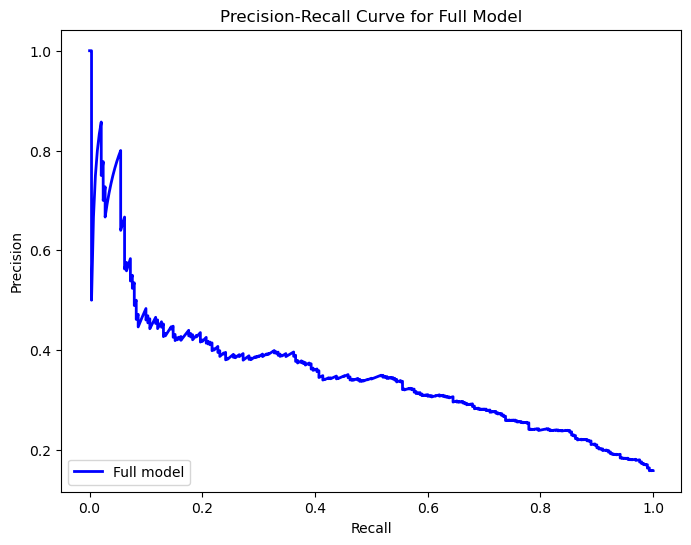

In [35]:
# PRC for all-variable classifier

from sklearn.metrics import precision_recall_curve

# PRC for full-featured classifier
y_prob_full = logreg.predict_proba(Xtest)[:, 1]  # Predicted probabilities for full model

# Compute precision-recall curve for full-featured model
precision_full, recall_full, _ = precision_recall_curve(ytest, y_prob_full)

# Plot the precision-recall curve for the full model
plt.figure(figsize=(8, 6))
plt.plot(recall_full, precision_full, color='blue', lw=2, label='Full model')

# Customize the plot for the full model
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Full Model')
plt.legend(loc="lower left")
plt.show()
